First few rows of the dataset:
         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  

Checking for missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-1-bc424ee30c7d>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


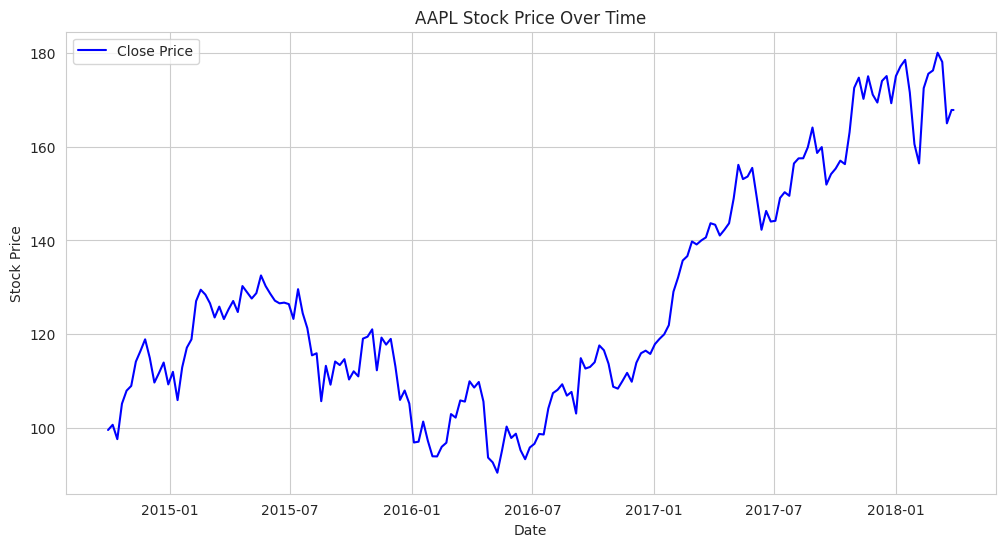

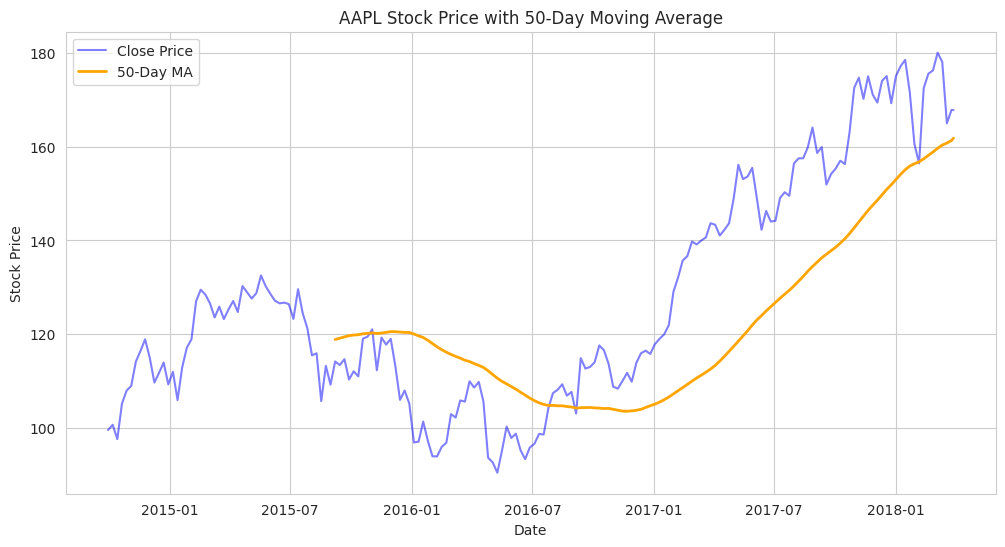

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'AAPL.csv'  # Replace with the path to your dataset
data = pd.read_csv('AAPL.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Preprocessing
# Ensure the 'Date' column is in datetime format and sort by date
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date')
else:
    raise ValueError("The dataset must have a 'Date' column.")

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Handle missing values if any (e.g., forward-fill method)
data.fillna(method='ffill', inplace=True)

# Visualize the time series data
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Assuming 'Close' is the column with stock prices
if 'Close' in data.columns:
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title('AAPL Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
else:
    raise ValueError("The dataset must have a 'Close' column for stock prices.")

# Additional visualization: Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Moving Average

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data.index, data['MA_50'], label='50-Day MA', color='orange', linewidth=2)
plt.title('AAPL Stock Price with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()